# Problem Statement: House Price Prediction
* The data contains 1460 training data points and 80 features that might help to predict the selling price of a house.

In [336]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Step 1: Reading and Understanding data

In [337]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [338]:
# Check number of rows and columns
df_train.shape

(1460, 81)

In [339]:
df_test.shape

(1459, 80)

In [340]:
# Top 5 record
pd.set_option('display.max_columns', 85)
df_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [341]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [342]:
# Check the summary
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [343]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [344]:
# Statistic of numeric column
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [345]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


# Step 2: Data Cleaning

### 1. Checking missing value/treatment of missing value:-

In [346]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [347]:
# Checking the percentage of null values
print(((df_train.isnull().sum()/len(df_train))*100).sort_values(ascending=False))

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64


In [348]:
df_train = df_train.drop(['PoolQC','MiscFeature','Alley','Fence'],1)

### Observation :-
* Here missing value in dataframe.
* Here 'PoolQC','MiscFeature','Alley' and 'Fence' columns more than 50% data are missing so we simply drop that columns.

In [349]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [350]:
# Checking the percentage of null values
print(((df_test.isnull().sum()/len(df_test))*100).sort_values(ascending=False))

PoolQC           99.794380
MiscFeature      96.504455
Alley            92.666210
Fence            80.123372
FireplaceQu      50.034270
                   ...    
Electrical        0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
SaleCondition     0.000000
Length: 80, dtype: float64


In [351]:
df_test = df_test.drop(['PoolQC','MiscFeature','Alley','Fence'],1)

### Observation :-
* Here missing value in dataframe.
* Here 'PoolQC','MiscFeature','Alley' and 'Fence' columns more than 50% data are missing so we simply drop that columns.

### 2. Treatment of missing values

##### Treatment of missing values for numarical data in train dataset

In [352]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan , strategy='mean')

In [353]:
# for numarical data
num_df_train = df_train.loc[:,df_train.dtypes != 'object']

In [354]:
num_df_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [355]:
num_arr_train = imputer.fit_transform(num_df_train)
df1 = pd.DataFrame(num_arr_train)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [356]:
df1.columns = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
df1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


##### Treatment of missing values for categorical data in train dataset

In [357]:
cat_imputer = SimpleImputer(missing_values=np.nan , strategy='most_frequent')
cat_df_train = df_train.loc[:,df_train.dtypes == 'object']

In [358]:
cat_arr_train = cat_imputer.fit_transform(cat_df_train)
df2 = pd.DataFrame(cat_arr_train)

In [359]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [360]:
cat_df_train.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [361]:
df2.columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
df2.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [362]:
df_train = pd.concat([df1,df2],axis=1)

In [363]:
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


### Observation :-
* For numerical data we use 'mean' strategy for missing value treatement.
* For categorical data we use 'most frequent' strategy for missing value treatmnet.

##### Treatment of missing values for numarical data in test dataset

In [364]:
# for numarical data
num_df_test = df_test.loc[:,df_test.dtypes != 'object']

In [365]:
num_df_test.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [366]:
df_train['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [367]:
num_arr_test = imputer.fit_transform(num_df_test)
df3 = pd.DataFrame(num_arr_test)
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,1329.0,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1958.0,1.0,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,928.0,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,1997.0,2.0,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,324.0,926.0,926.0,678.0,0.0,1604.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,1998.0,2.0,470.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,1017.0,1280.0,1280.0,0.0,0.0,1280.0,0.0,0.0,2.0,0.0,2.0,1.0,5.0,0.0,1992.0,2.0,506.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0


In [368]:
df3.columns = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']
df3.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,1329.0,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1958.0,1.0,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,928.0,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,1997.0,2.0,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,324.0,926.0,926.0,678.0,0.0,1604.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,1998.0,2.0,470.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,1017.0,1280.0,1280.0,0.0,0.0,1280.0,0.0,0.0,2.0,0.0,2.0,1.0,5.0,0.0,1992.0,2.0,506.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0


##### Treatment of missing values for categorical data in test dataset

In [369]:
cat_df_test = df_test.loc[:,df_test.dtypes == 'object']

In [370]:
cat_arr_test = cat_imputer.fit_transform(cat_df_test)
df4 = pd.DataFrame(cat_arr_test)

In [371]:
df4.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


In [372]:
cat_df_test.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [373]:
df4.columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
df4.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


In [374]:
df_test = pd.concat([df3,df4],axis=1)

In [375]:
df_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,1329.0,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1958.0,1.0,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,928.0,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,1997.0,2.0,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,324.0,926.0,926.0,678.0,0.0,1604.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,1998.0,2.0,470.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,1017.0,1280.0,1280.0,0.0,0.0,1280.0,0.0,0.0,2.0,0.0,2.0,1.0,5.0,0.0,1992.0,2.0,506.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


### Observation :-
* For numerical data we use 'mean' strategy for missing value treatement.
* For categorical data we use 'most frequent' strategy for missing value treatmnet.

### 2.checking outliers/treatment:-

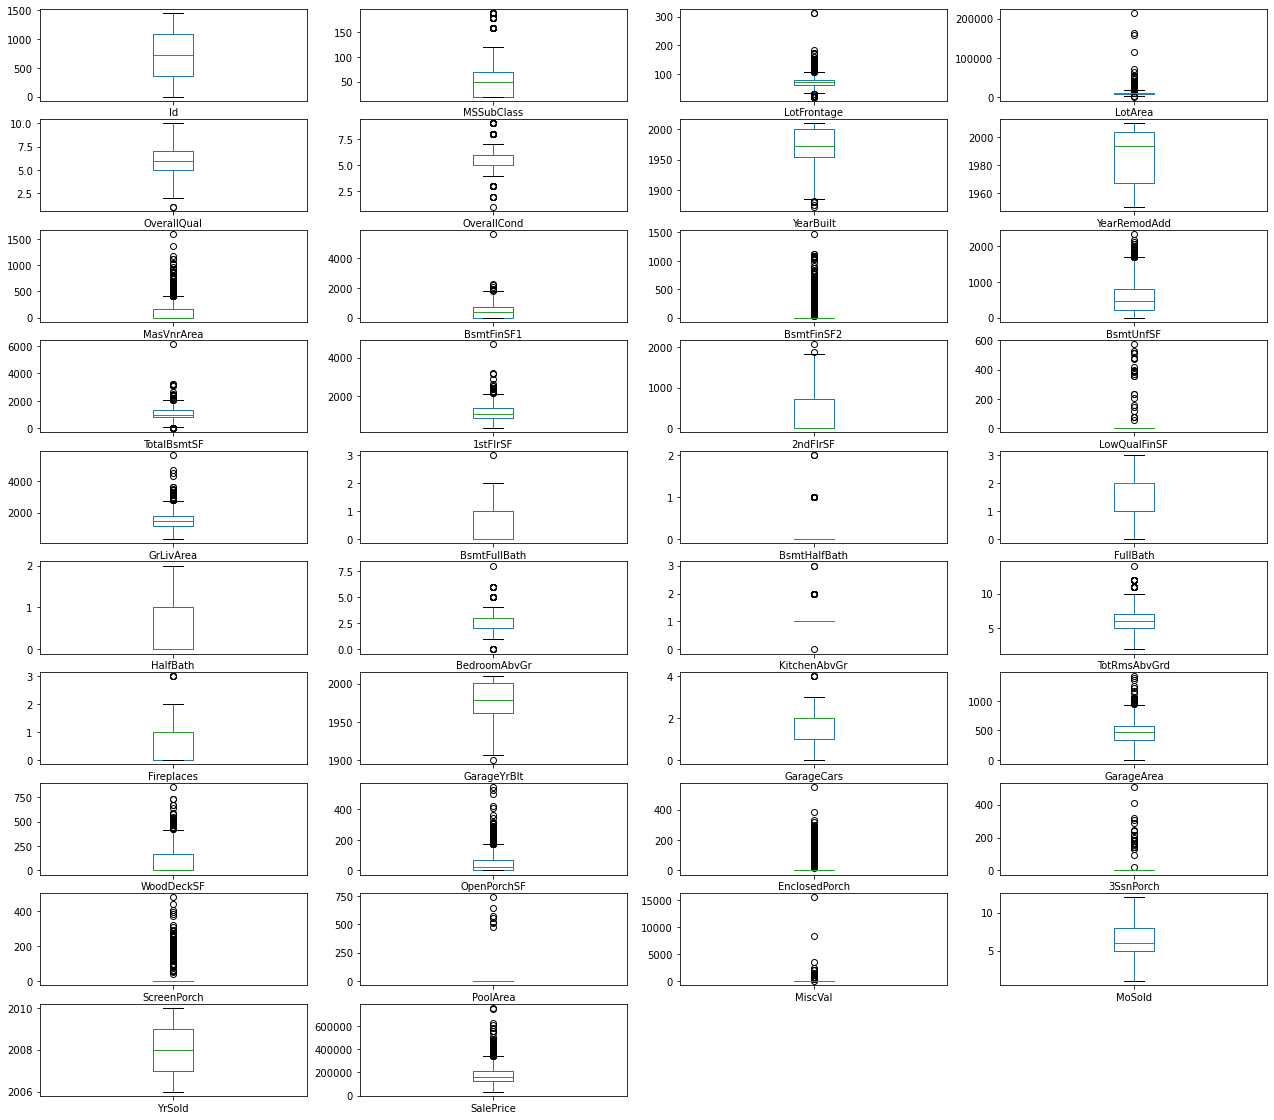

In [376]:
## checking outliers using boxplot:-

df_train.plot(kind='box', subplots=True, figsize=(22,20), layout=(10,4))
plt.show()

##### Next, we do capping to 99 percentile on numeric column of train dataframe :

In [377]:
def num(x):
    plt.figure(figsize=(6,6))
    plt.title(x)
    sns.boxplot(df_train[x])
    plt.show()
    return

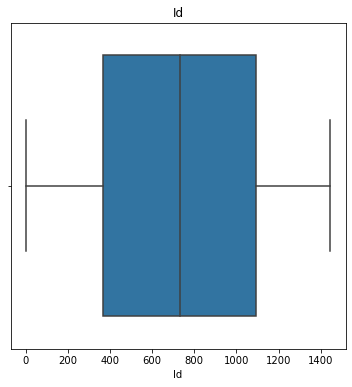

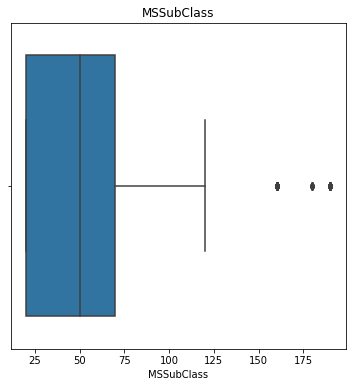

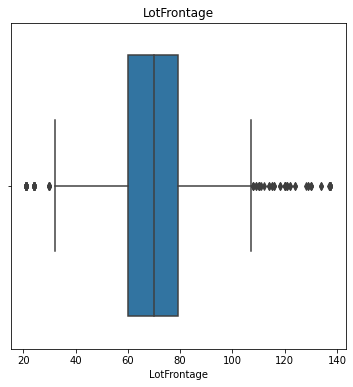

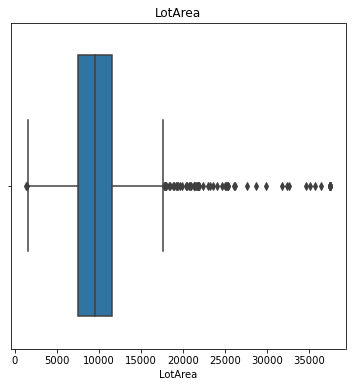

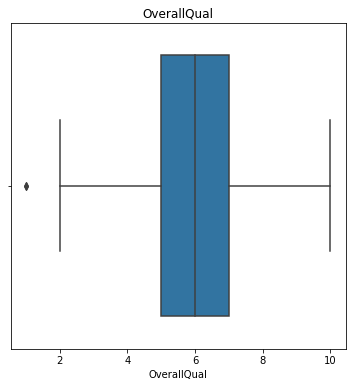

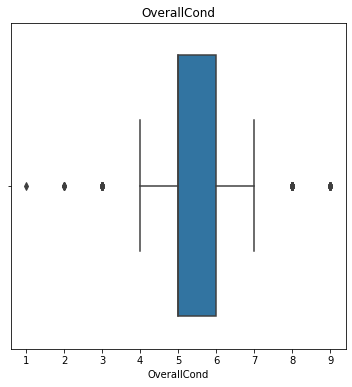

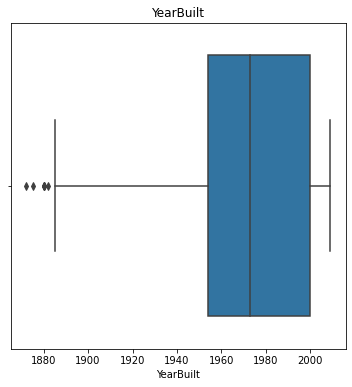

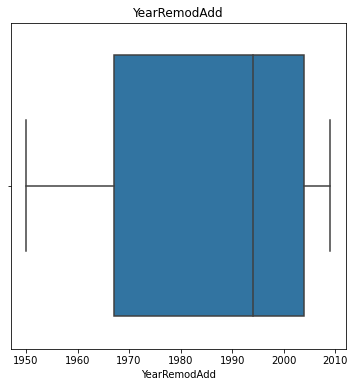

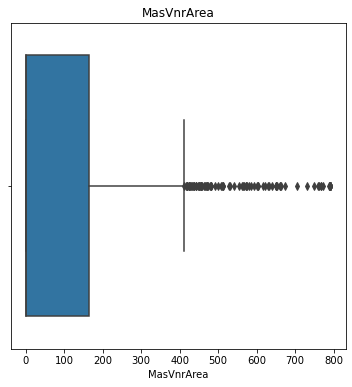

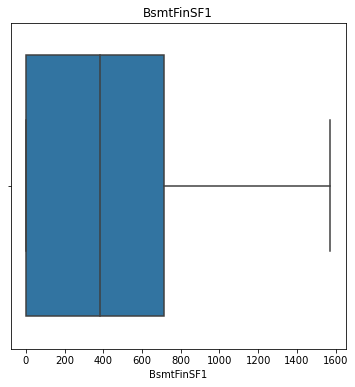

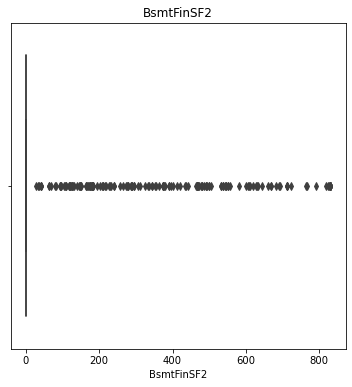

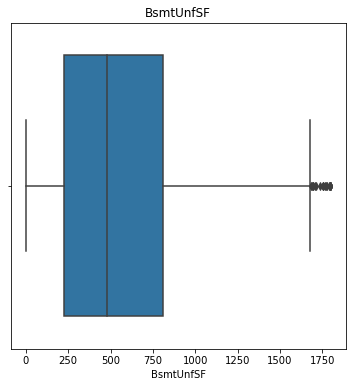

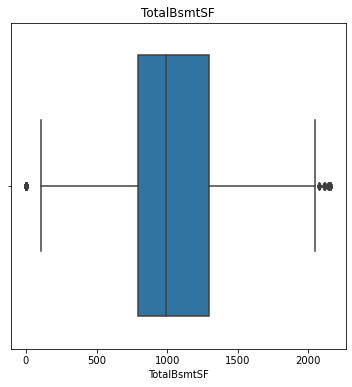

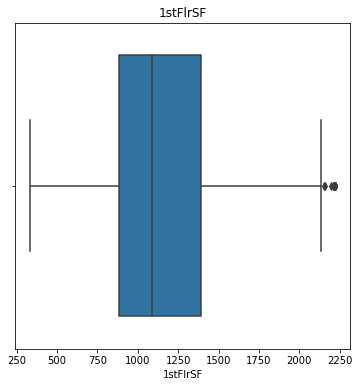

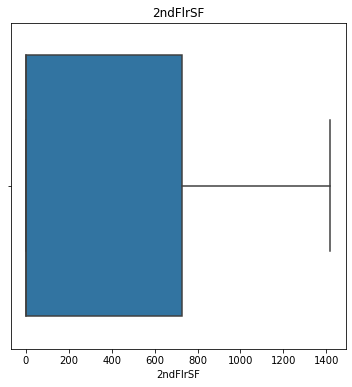

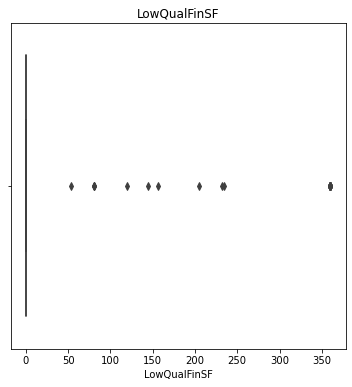

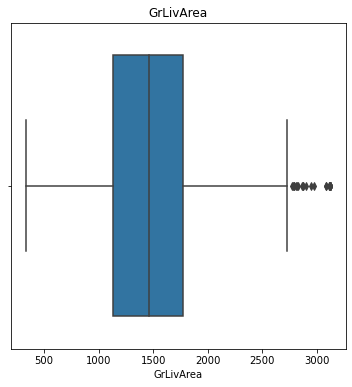

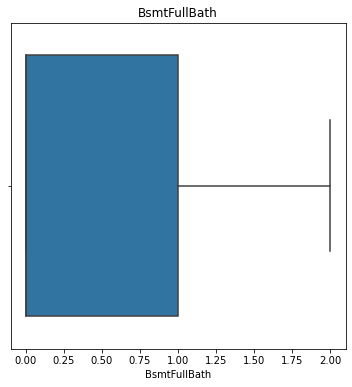

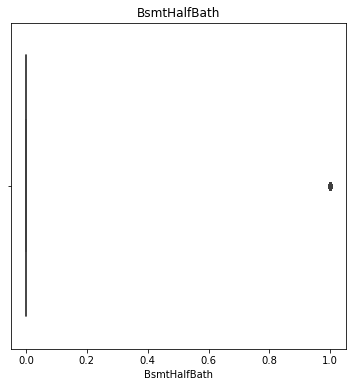

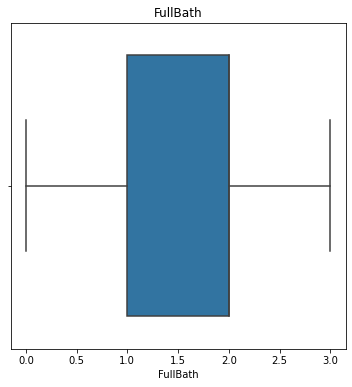

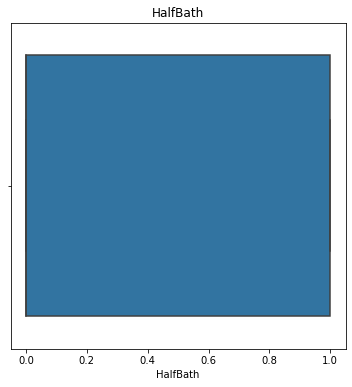

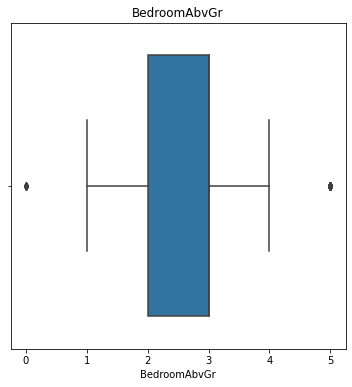

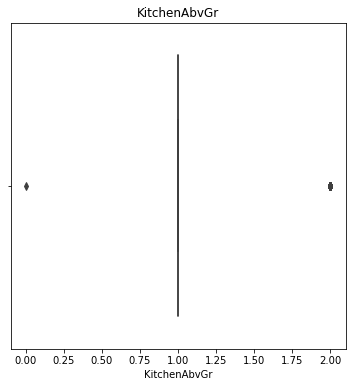

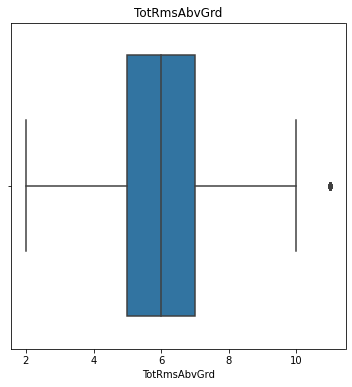

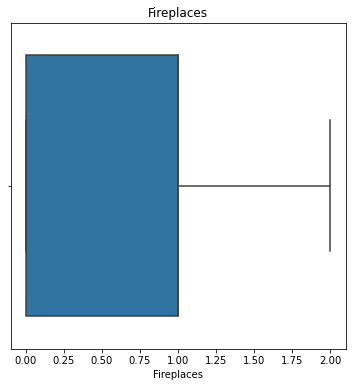

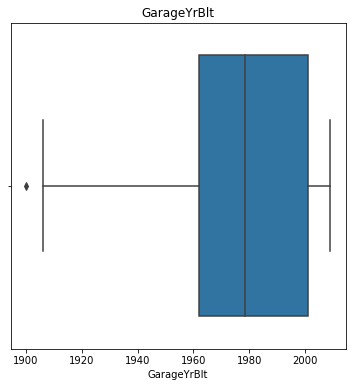

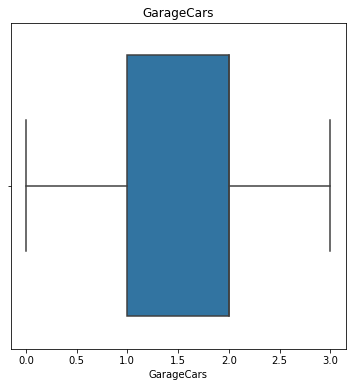

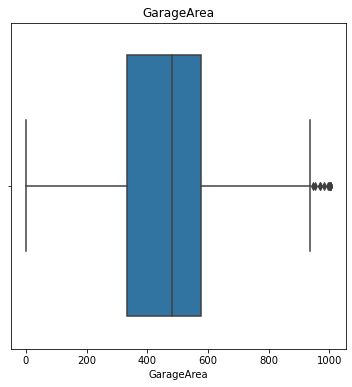

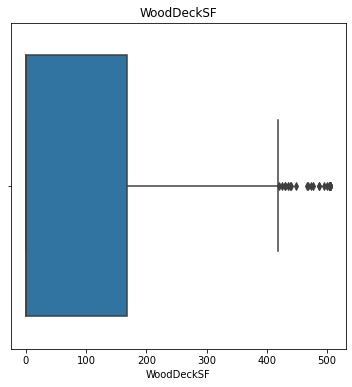

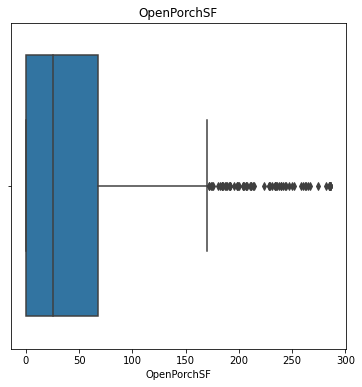

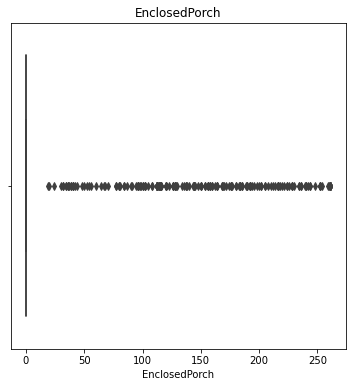

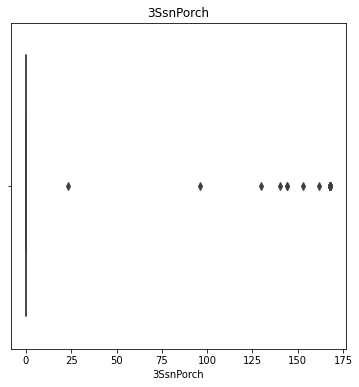

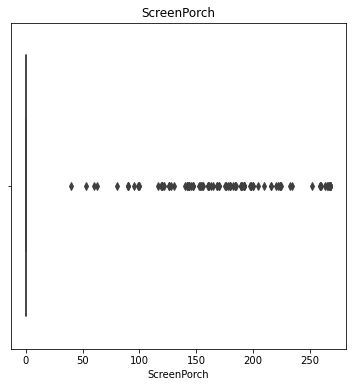

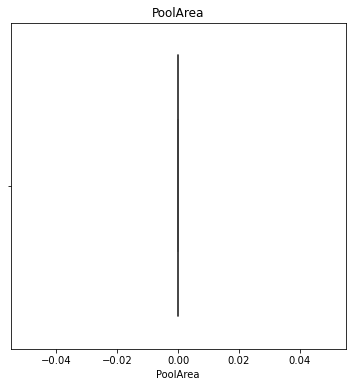

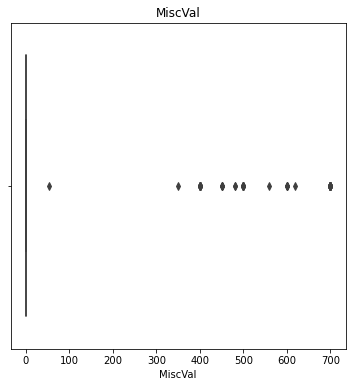

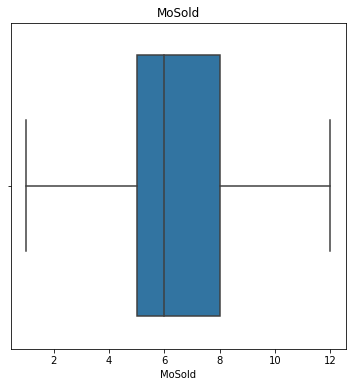

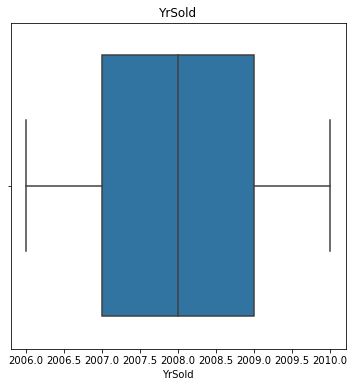

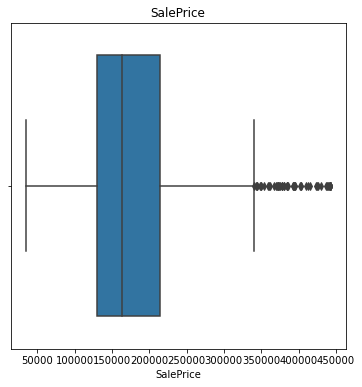

In [378]:
for x in num_df_train:
    q3,q1 = np.percentile(df_train[x],[75,25])
    q4= np.percentile(df_train[x],[99])
    df_train.loc[df_train[x] > q4[0], x] = q4[0]
    num(x)

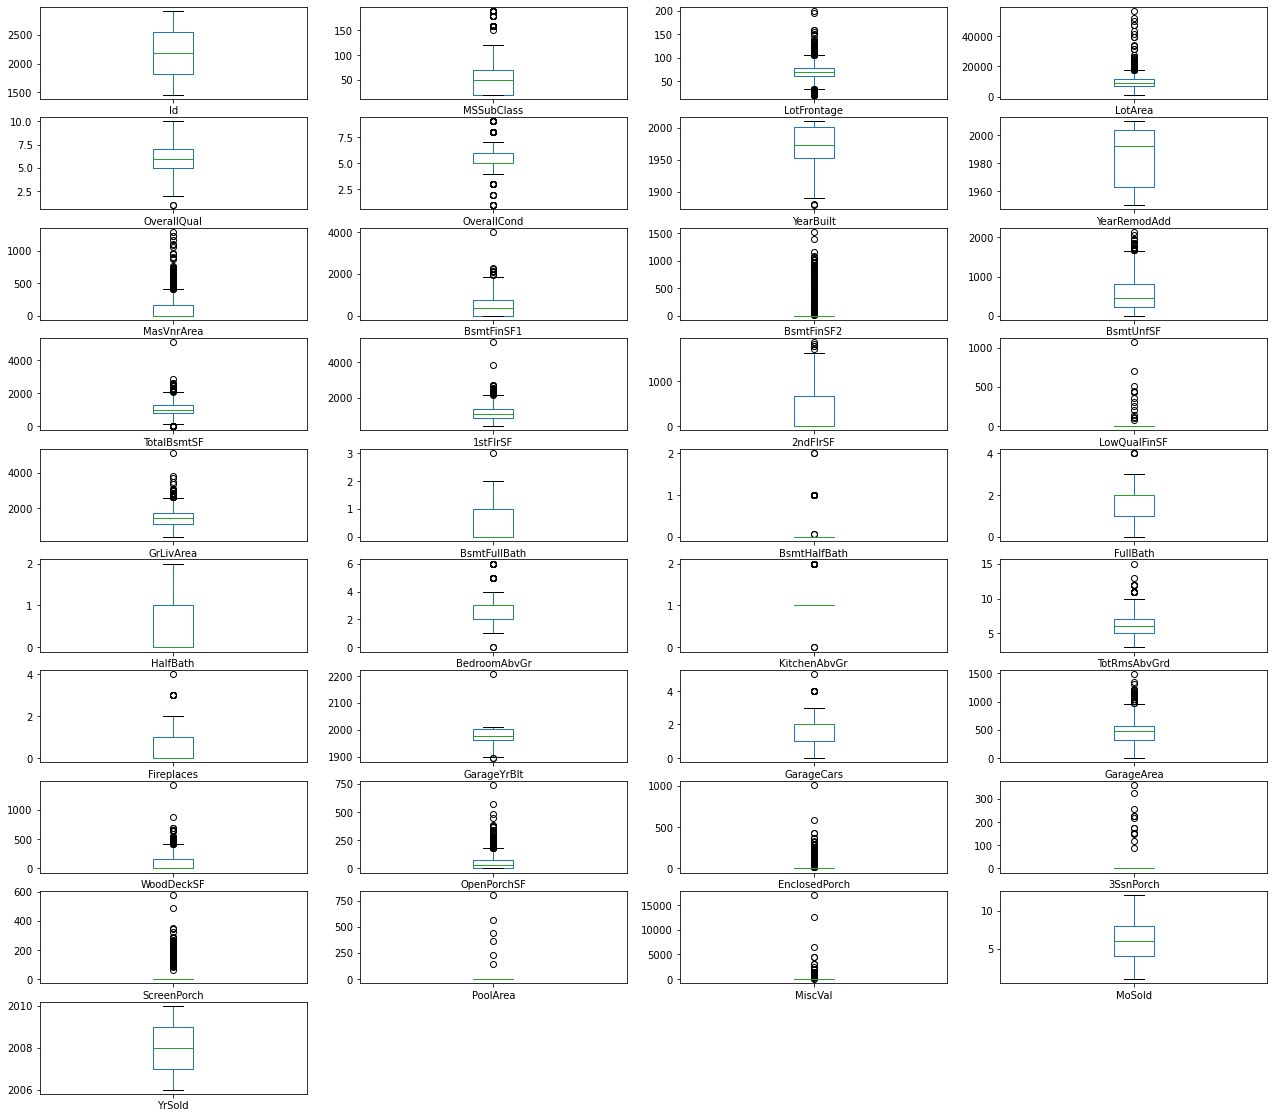

In [379]:
## checking outliers using boxplot:-

df_test.plot(kind='box', subplots=True, figsize=(22,20), layout=(10,4))
plt.show()

##### Next, we do capping to 99 percentile on numeric column of test dataframe :

In [380]:
def num(x):
    plt.figure(figsize=(6,6))
    plt.title(x)
    sns.boxplot(df_test[x])
    plt.show()
    return

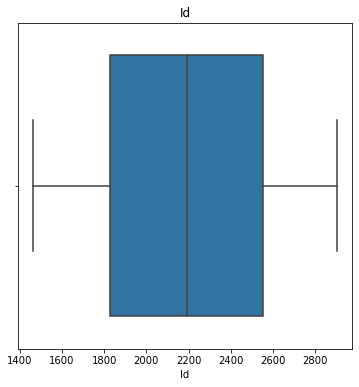

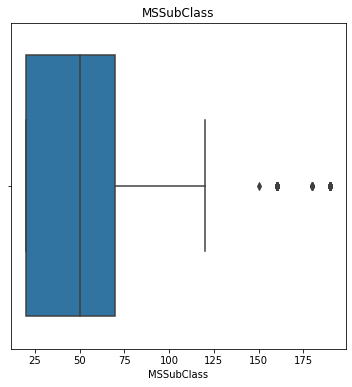

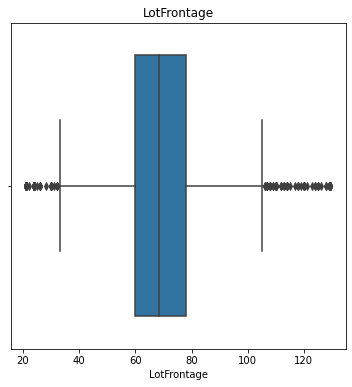

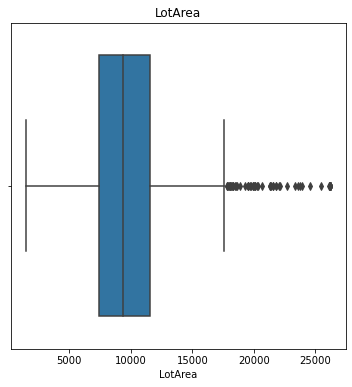

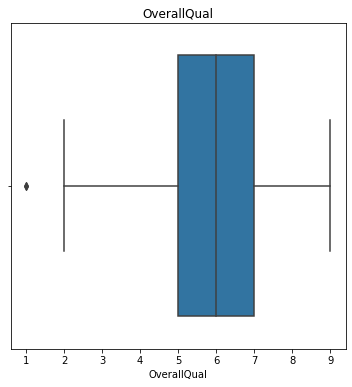

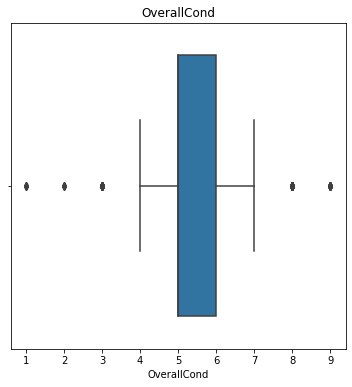

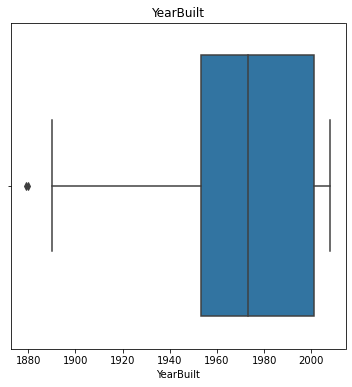

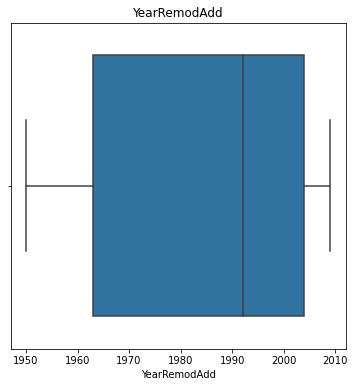

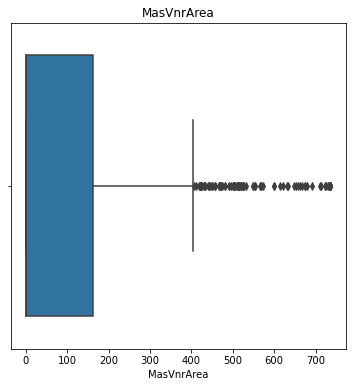

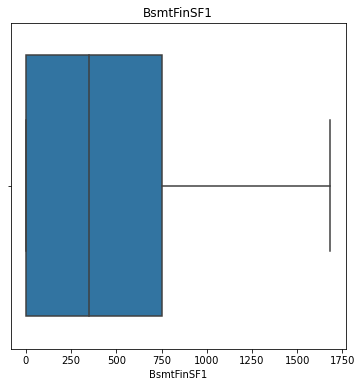

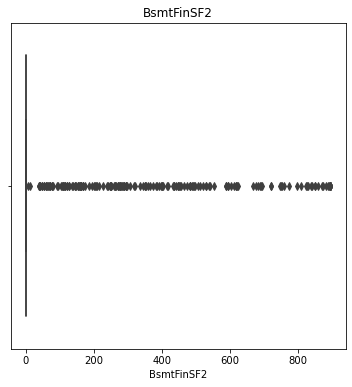

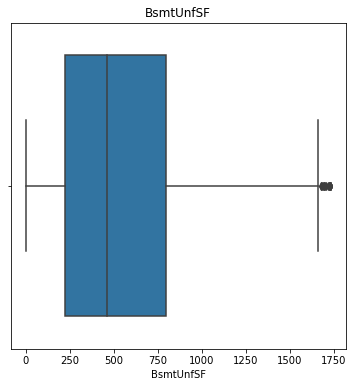

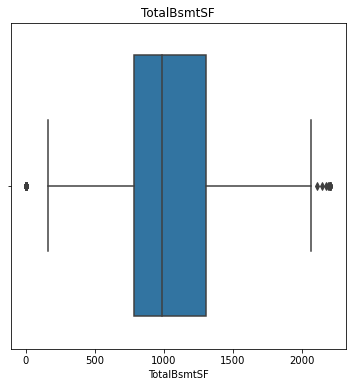

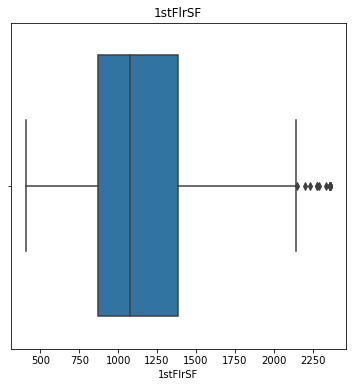

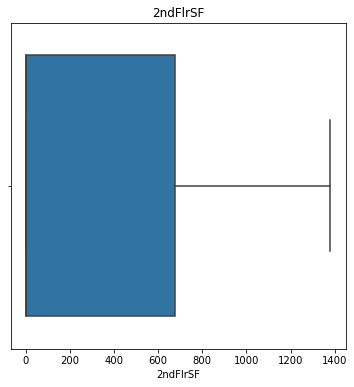

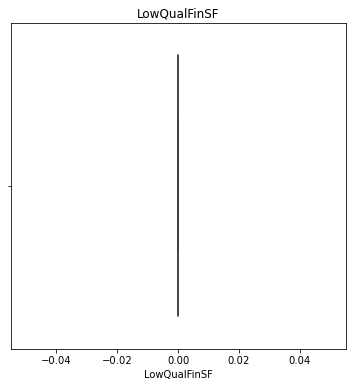

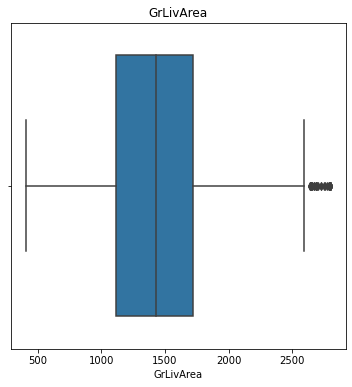

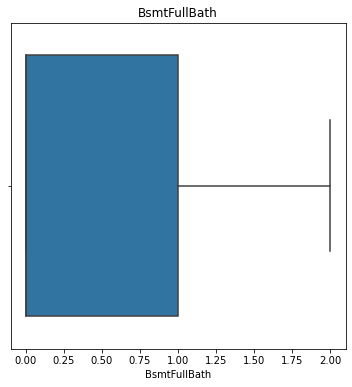

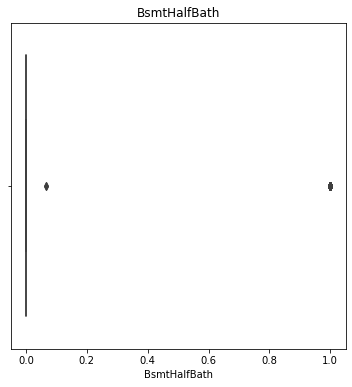

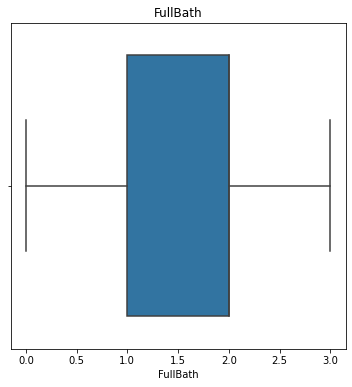

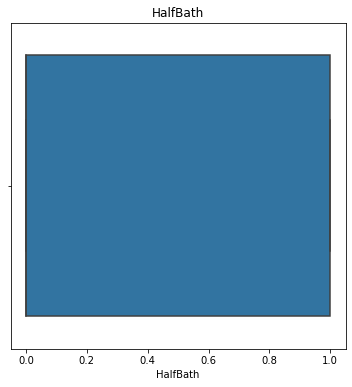

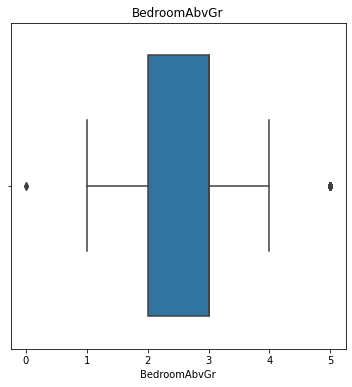

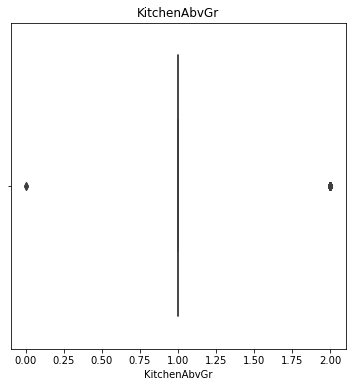

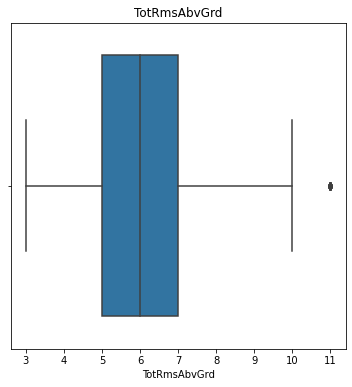

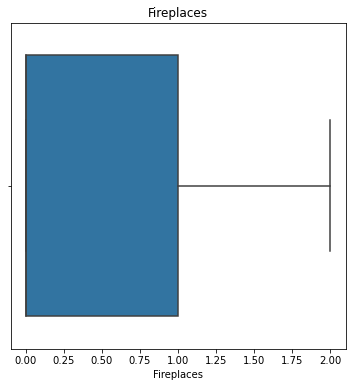

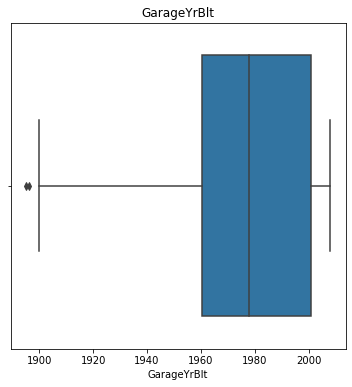

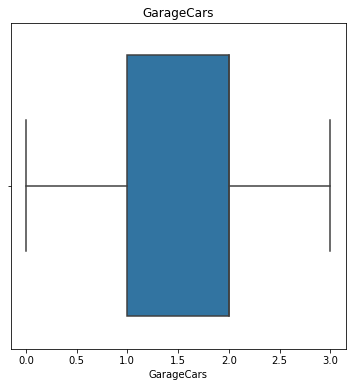

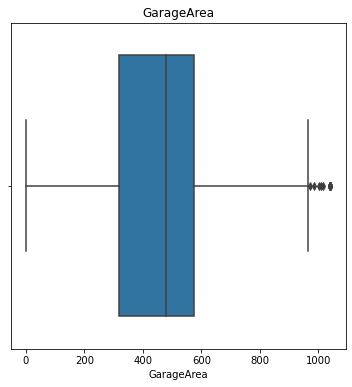

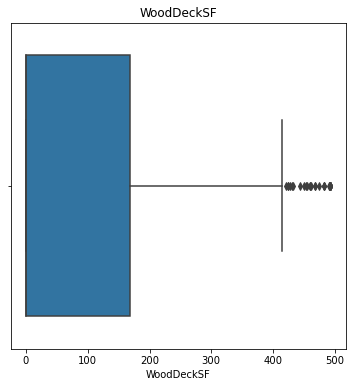

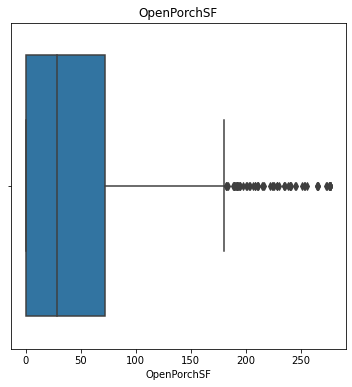

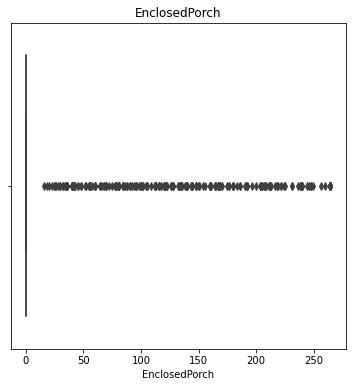

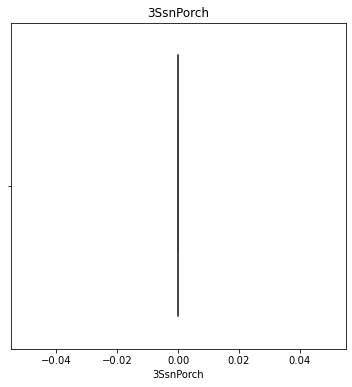

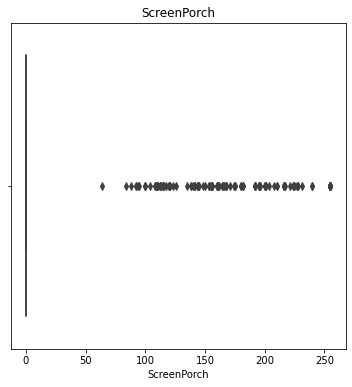

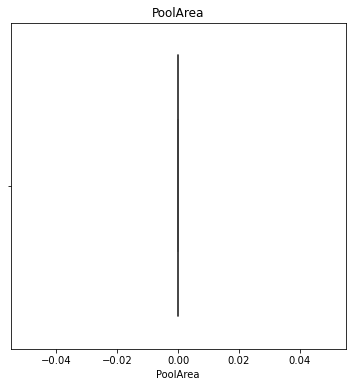

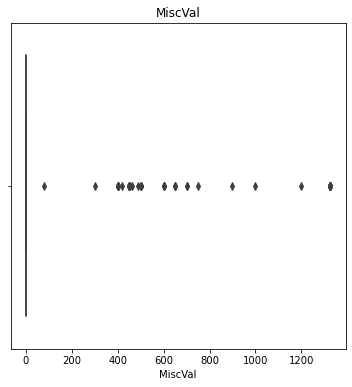

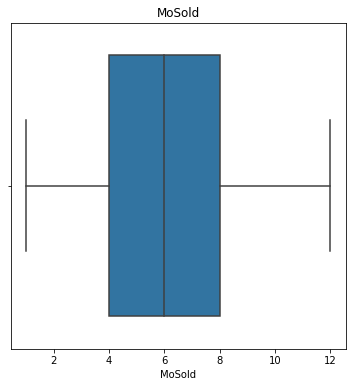

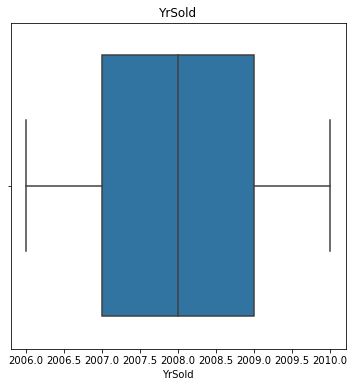

In [381]:
for x in num_df_test:
    q3,q1 = np.percentile(df_test[x],[75,25])
    q4= np.percentile(df_test[x],[99])
    df_test.loc[df_test[x] > q4[0], x] = q4[0]
    num(x)

# Step-3. Data analysis 

In [382]:
num_co = list(df_train.describe().columns)

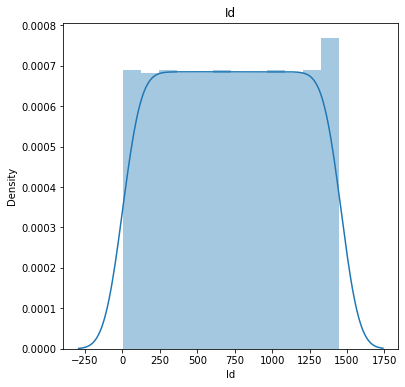

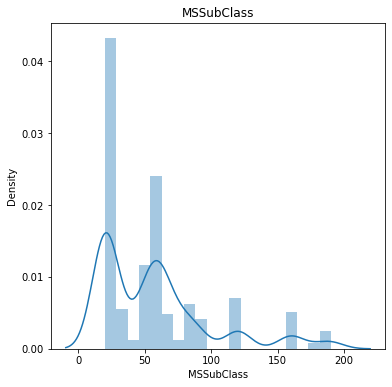

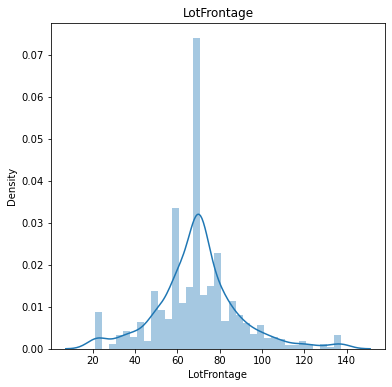

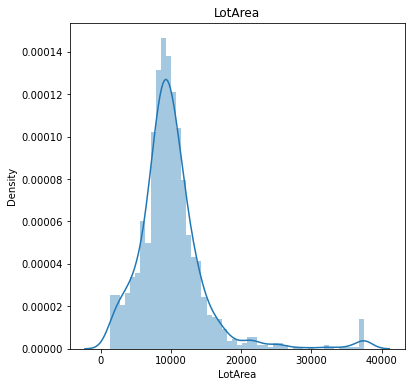

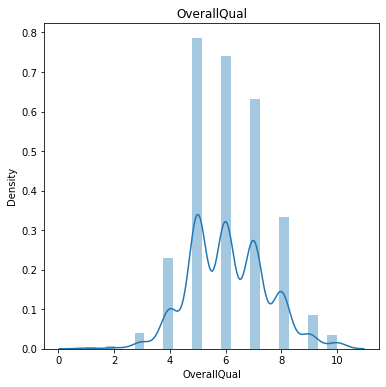

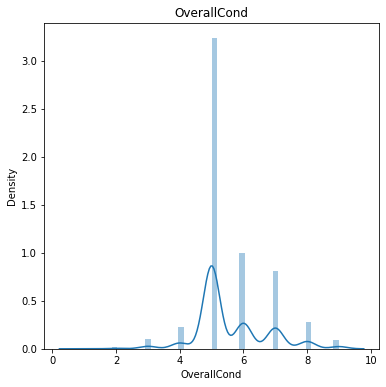

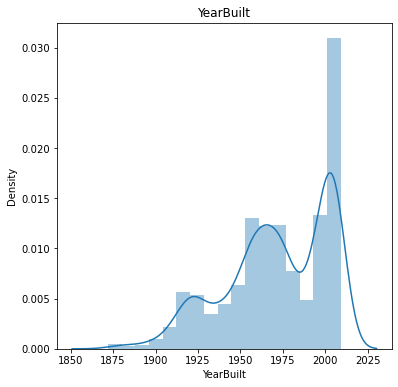

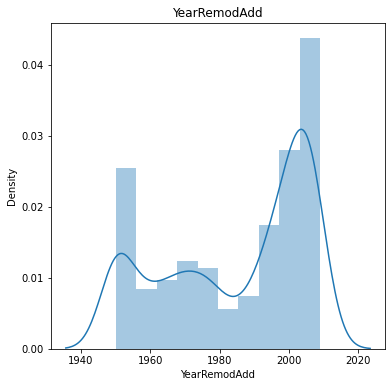

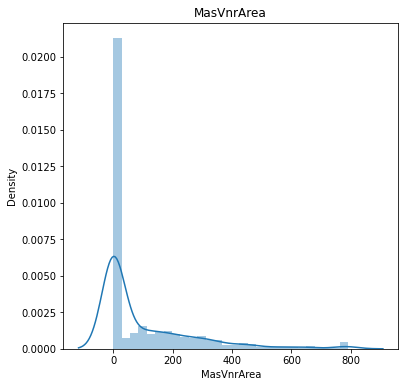

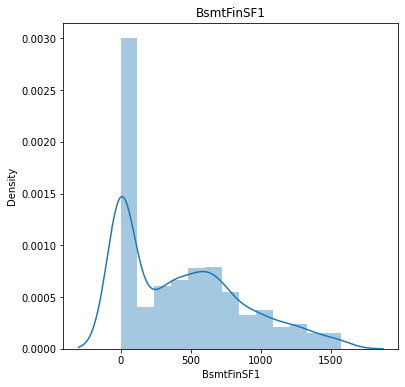

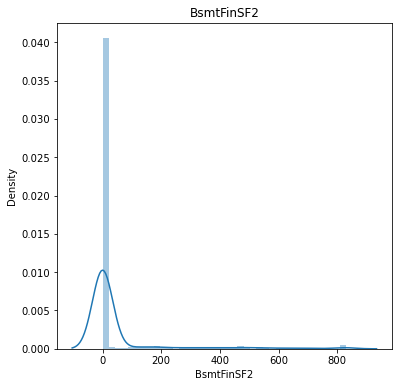

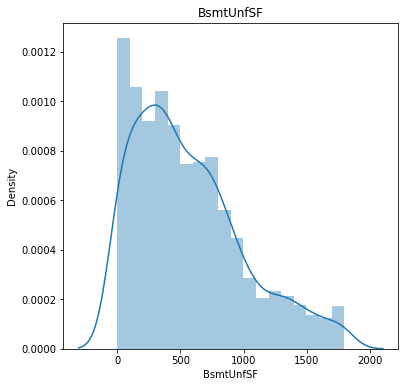

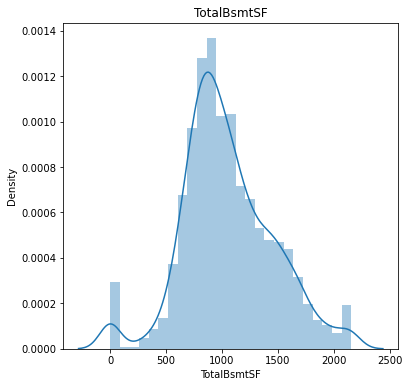

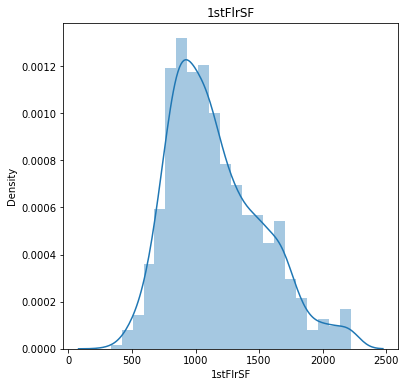

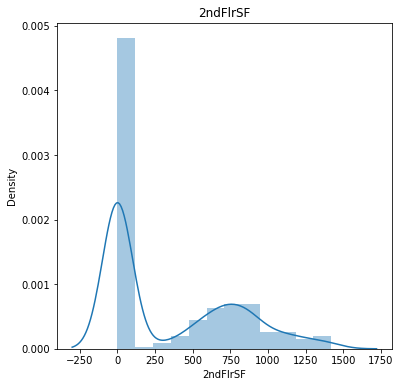

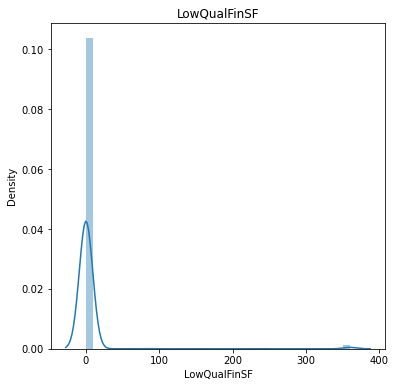

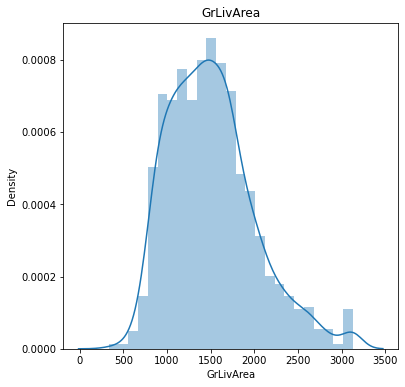

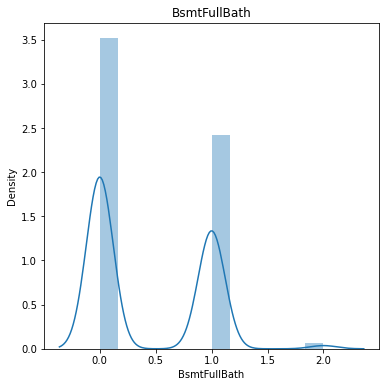

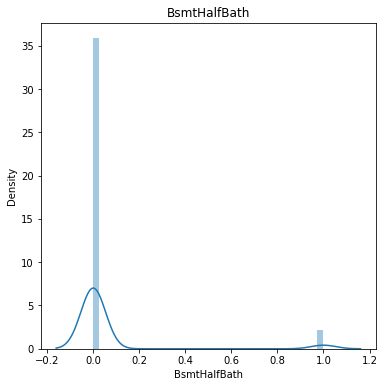

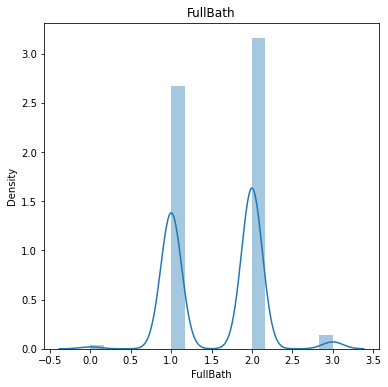

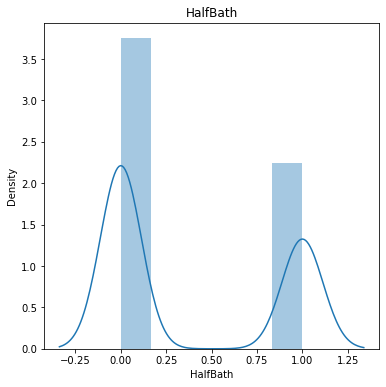

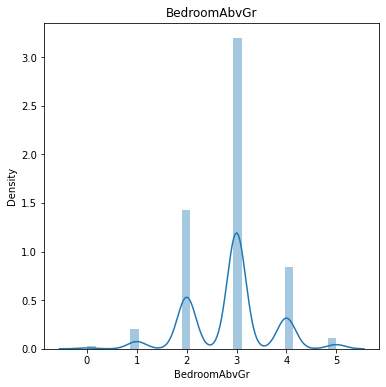

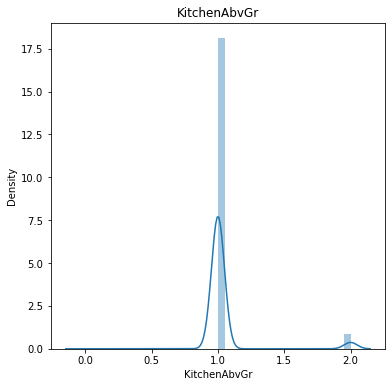

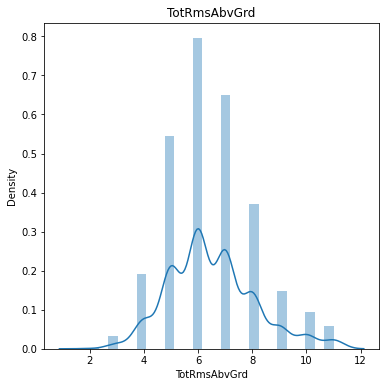

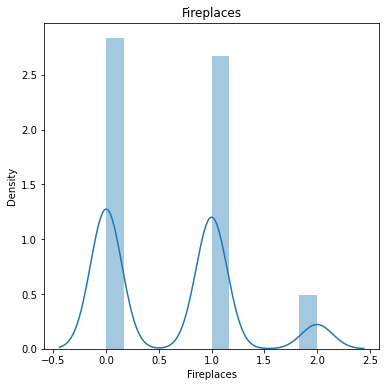

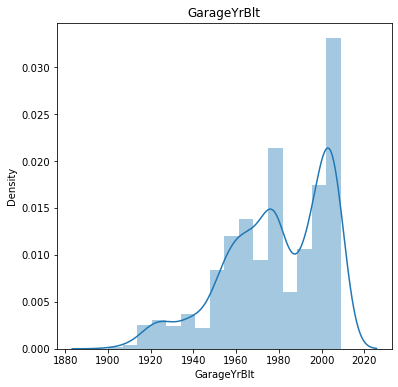

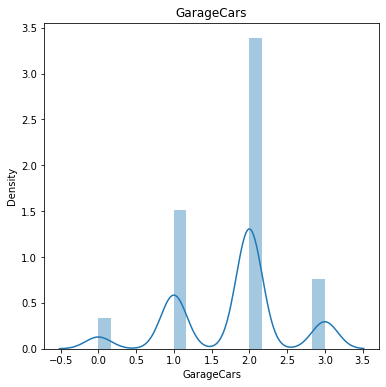

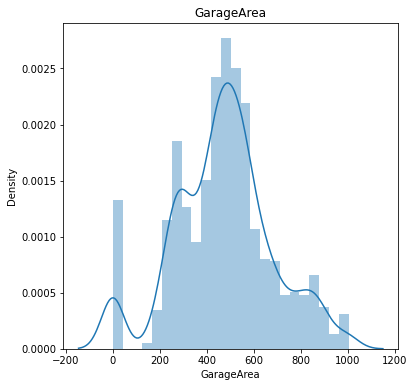

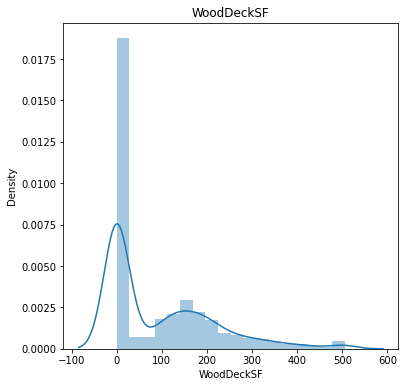

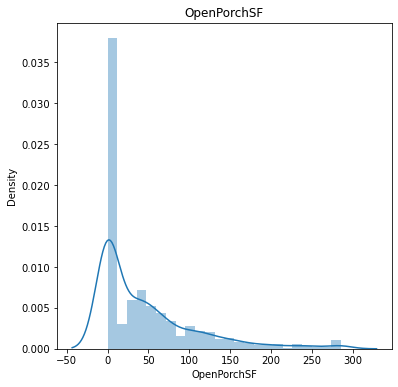

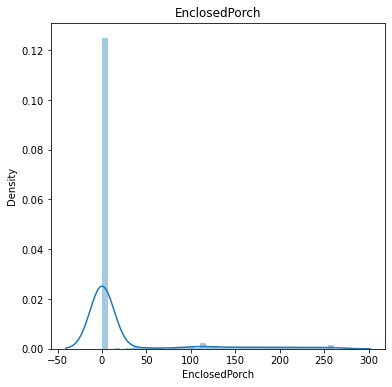

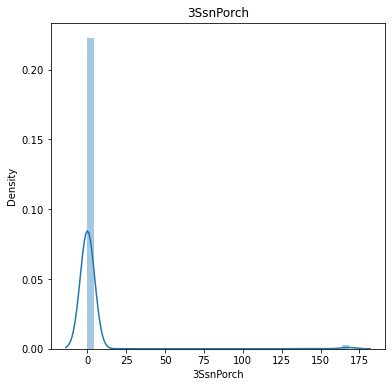

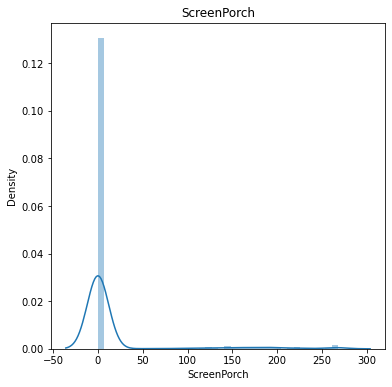

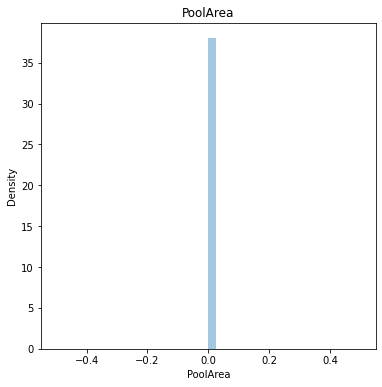

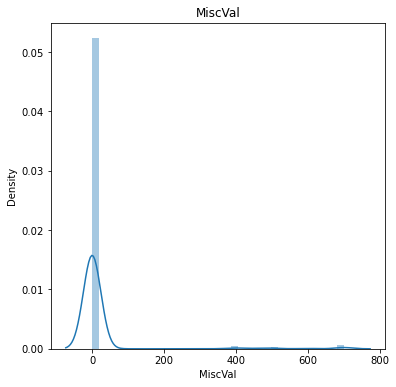

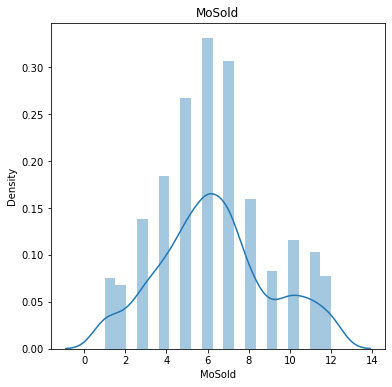

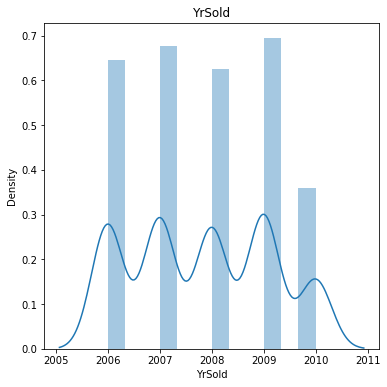

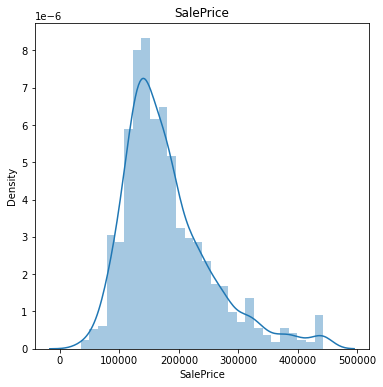

In [383]:
for col in num_co:
    plt.figure(figsize=(6,6))
    sns.distplot(df_train[col])
    plt.title(col)
    plt.show()

# 4.Data Preparation

### Encoding

In [384]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [385]:
cat_col = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [386]:
for i in cat_col:
    df_train[i]= le.fit_transform(df_train[i])

In [387]:
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.00,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,2,1,1,4,4,2,8,4
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.00,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,8,4
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.00,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,261.05,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,8,0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.00,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4


In [388]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()

### 2. Build a Simple Linear Regression model to predict the Sale price of the house. Use Area as the independent variable 

In [389]:
X = df_train['LotArea']
y = df_train['SalePrice']

In [390]:
# reshape the value of x
x_rshp = X.values.reshape((-1,1))

In [391]:
scl.fit(x_rshp)

StandardScaler()

In [392]:
X = scl.fit_transform(x_rshp)
# y = scl.transform(y)

In [393]:
X

array([[-0.31846956],
       [-0.09128952],
       [ 0.23466446],
       ...,
       [-0.20152123],
       [-0.06817642],
       [-0.02471589]])

In [394]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [395]:
# Train the model 
model.fit(X,y)

LinearRegression()

In [396]:
#predict the value of y
y_pred_simple_re = model.predict(X)

In [397]:
y_pred_simple_re

array([170663.61184232, 177188.24609646, 186549.67785241, ...,
       174022.38008446, 177852.05671189, 179100.24761268])

In [398]:
from sklearn.metrics import r2_score

r2_score(y,y_pred_simple_re)

0.1497056333557627

In [399]:
# sns.scatterplot(X,y_rshp)
# plt.plot(X,y_pred_simple_re,'r')

## Train_Test_Split

In [400]:
## CREATE X and y
X = df_train.drop('SalePrice',axis=1)
Y = df_train['SalePrice']

In [401]:
#### Here we create TRAIN | VALIDATION | TEST  #########
from sklearn.model_selection import train_test_split

In [402]:
# 70% of data is training data, set aside other 30%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

##### Feature selection using RFE :

In [403]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [404]:
lr = LinearRegression()
rfe = RFE(estimator = lr,n_features_to_select = 13) # we are finding top 7 features or columns

In [405]:
rfe = rfe.fit(X,Y)
rfe

RFE(estimator=LinearRegression(), n_features_to_select=13)

In [406]:
rfe.support_

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False])

In [407]:
rfe.ranking_

array([60, 38, 49, 63,  1, 12, 39, 43, 53, 57, 56, 52, 51, 47, 46, 41, 40,
        1,  3,  2,  9, 20,  1,  1,  1, 48,  1, 58, 54, 62, 59, 45, 44, 64,
       61, 50, 26, 16,  1, 22, 13,  1, 36,  1, 34, 42, 18,  5, 17,  7,  6,
       28, 33, 32,  1, 25, 15,  1, 23, 14, 21, 37, 27, 30,  1, 31,  1,  8,
       10, 24, 55, 35, 11,  4, 29, 19])

In [408]:
a = zip(tuple(X.columns),tuple(rfe.support_))

In [409]:
print(tuple(a))

(('Id', False), ('MSSubClass', False), ('LotFrontage', False), ('LotArea', False), ('OverallQual', True), ('OverallCond', False), ('YearBuilt', False), ('YearRemodAdd', False), ('MasVnrArea', False), ('BsmtFinSF1', False), ('BsmtFinSF2', False), ('BsmtUnfSF', False), ('TotalBsmtSF', False), ('1stFlrSF', False), ('2ndFlrSF', False), ('LowQualFinSF', False), ('GrLivArea', False), ('BsmtFullBath', True), ('BsmtHalfBath', False), ('FullBath', False), ('HalfBath', False), ('BedroomAbvGr', False), ('KitchenAbvGr', True), ('TotRmsAbvGrd', True), ('Fireplaces', True), ('GarageYrBlt', False), ('GarageCars', True), ('GarageArea', False), ('WoodDeckSF', False), ('OpenPorchSF', False), ('EnclosedPorch', False), ('3SsnPorch', False), ('ScreenPorch', False), ('PoolArea', False), ('MiscVal', False), ('MoSold', False), ('YrSold', False), ('MSZoning', False), ('Street', True), ('LotShape', False), ('LandContour', False), ('Utilities', True), ('LotConfig', False), ('LandSlope', True), ('Neighborhood', F

In [410]:
X_train = X_train.drop(['Id','MSSubClass','LotFrontage','LotArea','OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'FullBath',
                        'HalfBath', 'BedroomAbvGr','GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                        'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning', 'LotShape', 'LandContour',  'LotConfig',  'Neighborhood', 'Condition1', 
                        'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation',  
                        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical',  'Functional', 'FireplaceQu', 'GarageType',
                        'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],axis=1)

In [411]:
X_test = X_test.drop(['Id','MSSubClass','LotFrontage','LotArea','OverallCond','OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'FullBath',
                        'HalfBath', 'BedroomAbvGr','GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                        'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning', 'LotShape', 'LandContour',  'LotConfig',  'Neighborhood', 'Condition1', 
                        'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation',  
                        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical',  'Functional', 'FireplaceQu', 'GarageType',
                        'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],axis =1)

In [412]:
X_train.head()

,OverallQual,BsmtFullBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,Street,Utilities,LandSlope,ExterQual,BsmtQual,CentralAir,KitchenQual
1312,8.0,0.0,1.0,9.0,1.0,2.0,1,0,0,2,0,1,2
1408,4.0,0.0,1.0,6.0,0.0,2.0,1,0,0,3,1,1,3
1165,7.0,0.0,1.0,7.0,0.0,2.0,1,0,0,2,2,1,2
1346,7.0,0.0,1.0,9.0,1.0,2.0,1,0,0,3,3,1,3
399,7.0,1.0,1.0,7.0,0.0,2.0,1,0,0,2,2,1,2


In [413]:
X_test.head()

,OverallQual,BsmtFullBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,Street,Utilities,LandSlope,ExterQual,BsmtQual,CentralAir,KitchenQual
1054,8.0,1.0,1.0,7.0,1.0,2.0,1,0,0,2,2,1,2
361,5.0,1.0,1.0,8.0,0.0,1.0,1,0,0,3,3,1,3
1282,5.0,0.0,1.0,5.0,0.0,2.0,1,0,0,3,2,1,2
161,9.0,1.0,1.0,10.0,2.0,3.0,1,0,0,2,0,1,0
515,10.0,1.0,1.0,9.0,1.0,3.0,1,0,0,0,0,1,0


### Scale data

In [414]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [415]:
X_train

array([[ 1.37391375, -0.82695088, -0.19943135, ..., -2.66531623,
         0.24303777, -0.39236703],
       [-1.53923947, -0.82695088, -0.19943135, ..., -1.49673914,
         0.24303777,  0.8010827 ],
       [ 0.64562544, -0.82695088, -0.19943135, ..., -0.32816206,
         0.24303777, -0.39236703],
       ...,
       [-0.08266286,  1.11145233, -0.19943135, ..., -0.32816206,
         0.24303777,  0.8010827 ],
       [ 0.64562544,  1.11145233, -0.19943135, ..., -2.66531623,
         0.24303777, -0.39236703],
       [-0.81095116,  1.11145233, -0.19943135, ...,  0.84041503,
         0.24303777,  0.8010827 ]])

In [416]:
X_test

array([[ 1.37391375,  1.11145233, -0.19943135, ..., -0.32816206,
         0.24303777, -0.39236703],
       [-0.81095116,  1.11145233, -0.19943135, ...,  0.84041503,
         0.24303777,  0.8010827 ],
       [-0.81095116, -0.82695088, -0.19943135, ..., -0.32816206,
         0.24303777, -0.39236703],
       ...,
       [ 0.64562544, -0.82695088, -0.19943135, ..., -0.32816206,
         0.24303777, -0.39236703],
       [-1.53923947, -0.82695088,  4.77175976, ...,  0.84041503,
         0.24303777,  0.8010827 ],
       [-0.81095116,  3.04985554,  4.77175976, ...,  0.84041503,
         0.24303777,  0.8010827 ]])

### 3. Build Multiple Linear Regression model to predict Sale price of the house.

In [417]:
lr_mul_reg = LinearRegression()

In [418]:
lr_mul_reg.fit(X_train,y_train)

LinearRegression()

In [419]:
y_pred_mul_reg = lr_mul_reg.predict(X_test)

In [420]:
r2_score(y_test,y_pred_mul_reg)

0.7855894142548572

### 4. Use dimensionality reduction technique PCA/LDA and build Multiple Linear Regression model to predict Sale price of the house.

###### Use dimensionality reduction technique LDA

In [421]:
## CREATE X and y
X = df_train.iloc[:,:-1].values
Y = df_train.iloc[:, 1].values

In [422]:
scl_lda = StandardScaler()

In [423]:
X = scl.fit_transform(X)

In [424]:
# 70% of data is training data, set aside other 30%
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X, Y, test_size=0.2, random_state=101)

In [425]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [426]:
lda = LDA(n_components=2)

In [427]:
X_train_lda = lda.fit_transform(X_train_lda, y_train_lda)
X_test_lda = lda.transform(X_test_lda)

In [428]:
lda.intercept_

array([-1.38631672e+28, -7.36509869e+27, -2.90421722e+27, -1.43772162e+27,
       -4.80522782e+26, -9.40153788e+25, -1.74469501e+27, -3.33397996e+27,
       -5.43256167e+27, -8.04044014e+27, -1.11576154e+28, -4.05558987e+28,
       -1.08274228e+29, -1.54356515e+29, -1.80453439e+29])

In [429]:
lr_lda = LinearRegression()

In [430]:
lr_lda.fit(X_train_lda,y_train_lda)

LinearRegression()

In [431]:
y_pred_lda = lr_lda.predict(X_test_lda)

In [432]:
r2_score(y_test_lda,y_pred_lda)

1.0

### 5. Build a model using Lasso and Ridge regression to reduce model complexity.

##### Lasso Regression

In [433]:
from sklearn.linear_model import Lasso

In [434]:
lasso = Lasso(alpha=0.0001)

In [435]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.0001)

In [436]:
y_pred_lasso = lasso.predict(X_test)

In [437]:
mse = mean_squared_error(y_test,y_pred_lasso)
mse

1165982344.3485384

In [438]:
lasso.coef_

array([24819.48883555,  8968.81595319, -4459.6838414 , 17028.38846582,
        6845.87070352, 12369.45575973,  1329.47595415, -1202.63764696,
        3076.29562931, -9040.75733566, -8420.18311195,  3152.85784495,
       -9167.6495544 ])

In [439]:
r2_score(y_test,y_pred_lasso)

0.7855894140155398

##### Ridge Regression

In [440]:
from sklearn.linear_model import Ridge

In [441]:
ridge = Ridge(alpha=0.0001)

In [442]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [443]:
y_pred_ridge = ridge.predict(X_test)

In [444]:
mse = mean_squared_error(y_test,y_pred_ridge)
mse

1165982335.746939

In [445]:
r2_score(y_test,y_pred_ridge)

0.7855894155972738

### 6. Build SVR model to predict Sale price of the house.

In [446]:
from sklearn.svm import SVR

In [447]:
svr = SVR(C = 10000 , gamma = 0.2)

In [448]:
svr.fit(X_train,y_train)

SVR(C=10000, gamma=0.2)

In [449]:
svr_pred = svr.predict(X_test)

In [450]:
r2_score(y_test,svr_pred)

0.6166519897881918

### 7. Build Decision Tree Regressor to predict Sale price of the house.

In [451]:
from sklearn.tree import DecisionTreeRegressor

In [452]:
#Create Decision Tree Classifer for criterion="gini"
dt = DecisionTreeRegressor()

In [453]:
# fit the model
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [454]:
y_pred_tree = dt.predict(X_test)

In [455]:
r2_score(y_test,y_pred_tree)

0.6758782877518018

### 8. Build Random Forest Regression model to predict Sale price of the house.

In [456]:
from sklearn.ensemble import RandomForestRegressor

In [457]:
rfr = RandomForestRegressor()

In [458]:
rf_regressor = rfr.fit(X_train,y_train)

In [459]:
y_pred_rfr = rf_regressor.predict(X_test)

In [460]:
r2_score(y_pred_rfr,y_test)

0.7328276741065936

### 9. Use GridsearchCV and RandomizedsearchCV for tuning hyperparameters and fit your model on the optimal              parameters. 

##### GridsearchCV

In [461]:
from sklearn.model_selection import GridSearchCV

In [462]:
rfr = RandomForestRegressor()

In [463]:
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [464]:
grid = GridSearchCV(rfr, param_grid, n_jobs=-1, cv=5)

In [465]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [466]:
print('Best hyper parameter :' , grid.best_params_)

Best hyper parameter : {'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 30}


In [467]:
rfr = RandomForestRegressor(bootstrap=True , max_features= 'sqrt' , n_estimators= 30 , min_impurity_split=8)

In [468]:
rf_grid = rfr.fit(X_train,y_train)

In [469]:
y_pred_rfr_grid = rf_grid.predict(X_test)

In [470]:
r2_score(y_pred_rfr_grid,y_test)

0.7231987670775983

##### RandomizedsearchCV

In [471]:
from sklearn.model_selection import RandomizedSearchCV

In [472]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [473]:
rf = RandomForestRegressor()

In [474]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [475]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]},
                   random_state=42, verbose=2)

In [476]:
print('Best hyper parameter :' , grid.best_params_)

Best hyper parameter : {'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 30}


In [477]:
rf_random.best_score_

0.8231698695104813

In [478]:
rf = RandomForestRegressor(bootstrap=True , max_features= 'sqrt' , n_estimators= 20 , min_impurity_split=8)

In [479]:
rf_randomized = rf.fit(X_train,y_train)

In [480]:
y_pred_randomized = rf_randomized.predict(X_test)

In [481]:
r2_score(y_test,y_pred_randomized)

0.7732858416636946

### 10. Model Selection: Evaluate and compare performance of all the models to find the best model. 

In [482]:
compare = pd.DataFrame({'Model':['Simple Linear Regression' ,' Multiple Linear Regression' , 'Lasso' , 'Ridge' ,'SVR',
                                'Decision Tree Regressor' , 'Random Forest Regression'],
                        'r2_score':[r2_score(y,y_pred_simple_re)*100,r2_score(y_pred_mul_reg,y_test)*100,
                                    r2_score(y_test,y_pred_lasso)*100,r2_score(y_test,y_pred_ridge)*100,
                                    r2_score(y_test,svr_pred)*100,r2_score(y_test,y_pred_tree)*100,
                                    r2_score(y_test,y_pred_rfr)*100]})

In [483]:
compare.sort_values(by='r2_score', ascending=False)

,Model,r2_score
3,Ridge,78.558942
2,Lasso,78.558941
6,Random Forest Regression,77.567111
1,Multiple Linear Regression,74.943637
5,Decision Tree Regressor,67.587829
4,SVR,61.665199
0,Simple Linear Regression,14.970563
